<h1 style = "font-family:Verdana;text-align:center;font-size:250%">Tutorial Neural Networks and Sentiment Analysis: Biomedical Language Case Study </h1>
<p style = "font-family:Verdana;font-size:125%"> Hello and Welcome; the second assignment of Week3!! </p>
<p style = "font-family:Verdana;font-size:125%"> In this notebook, we are going over the topic of neural networks and sentiment analysis. We also propose to dive into more details through deploying neural word representation for the dependent-domain task of biomedical language case study. Finally, use these reperesentations for creating sequential sentiment analysis classifier.</p>
<p style = "font-family:Verdana;font-size:125%">By the end of this assignment, you should be able to understand the followings:</p>
<ul style = "align:center;font-family:Verdana;font-size:125%">
  <li>Understaning what neural network stands for</li>
  <li>How to use pre-trained embedding from... (Google and GloVe)</li>
  <li>Building an embedding vocabulary from scratch</li>
  <li>Build and execute a sentiment sequential model based on neural word representatin </li>
  <li> use pre-trained biomedical vectors from highly predefined controlled medical vocabularies and ontologies</li>
  <li> analogy and similarity comparison</li>
</ul>


<h1 style = "font-family:Verdana;text-align:center;font-size:250%;color:blue">Part 1 : Create Neural Networks for training Word2vec Embedding(CBOW) from scratch By Gensim </h1>

Presentation:

In [3]:
from utils.w2v import *
from utils.utilsBio import *
# from utils.utils import *

#### read and download your data from github repository from https://github.com/hananeGrissette/Datasets-for-online-biomedical-WSD
data_ = pd.read_csv('utils/Parkinson_data_p.csv')
data_.comments = data_.comments.apply(lambda x:preprocess(x))
comments = []
for raw in data_.comments:
    for x in item_in_list(raw):
        comments.append(x)
print(len(data_.comments))
print(len(comments))
print(comments[6])
corpus = build_corpus(comments)        
# corpus = remove_sw(corpus)[0]
corpus[0:5]

Using TensorFlow backend.


/data/h.grissette/SA/Paper
1162
2807
 hi sachin great to hear from you are you a caregiver who are you caring for what other information are you looking for 


['yes', 'the', 'first', 'time', 'thanks']

In [2]:
item_in_list(data_.comments[5])

[' indeed i have a wonderful caregiver my wife who just happens to be a nurse though this is a two edged sword because she deals in her job with many people in the most extreme stages of pd and can t help thinking i may end up like them so i m afraid my pd has upset her more than it has mei ve been founate of course if i were truly founate i wouldn t have pd to begin with in that my day to day living hasn t been grossly affected so our plans for retirement and eventual need for assisted living are what they ve always been when we can t care for ourselves someone else will have to and so we save every penny old and incapacitated is bad but old incapacitated and broke is worse ']

## Why I seperate the training of the model in 3 steps:
I prefer to separate the training in 3 distinctive steps for clarity and monitoring.
1. `Word2Vec()`: 
>In this first step, I set up the parameters of the model one-by-one. <br>I do not supply the parameter `Comments`, and therefore leave the model uninitialized, purposefully.
2. `.build_vocab()`: 
>Here it builds the vocabulary from a sequence of sentences and thus initialized the model. <br>With the loggings, I can follow the progress and even more important, the effect of `min_count` and `sample` on the word corpus. I noticed that these two parameters, and in particular `sample`, have a great influence over the performance of a model. Displaying both allows for a more accurate and an easier management of their influence.
3. `.train()`:
>Finally, trains the model.<br>
The loggings here are mainly useful for monitoring, making sure that no threads are executed instantaneously.

## The parameters:

* `min_count` <font color='purple'>=</font> <font color='green'>int</font> - Ignores all words with total absolute frequency lower than this - (2, 100)


* `window` <font color='purple'>=</font> <font color='green'>int</font> - The maximum distance between the current and predicted word within a sentence. E.g. `window` words on the left and `window` words on the left of our target - (2, 10)


* `size` <font color='purple'>=</font> <font color='green'>int</font> - Dimensionality of the feature vectors. - (50, 300)


* `sample` <font color='purple'>=</font> <font color='green'>float</font> - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial.  - (0, 1e-5)


* `alpha` <font color='purple'>=</font> <font color='green'>float</font> - The initial learning rate - (0.01, 0.05)


* `min_alpha` <font color='purple'>=</font> <font color='green'>float</font> - Learning rate will linearly drop to `min_alpha` as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00


* `negative` <font color='purple'>=</font> <font color='green'>int</font> - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)


* `workers` <font color='purple'>=</font> <font color='green'>int</font> - Use these many worker threads to train the model (=faster training with multicore machines)

Phrases<52280 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
False
Term Out of Vocabulary
True
w2v_model.wv['parkinson'] =  [-0.04570231  0.0176921  -0.00900386 -0.07256448  0.02896536  0.00106644
 -0.10274304  0.0141404  -0.03002211  0.04274078 -0.09553681  0.04385134
  0.09281687 -0.01301445 -0.11839552  0.01478921 -0.01115347  0.04030959
 -0.04525807  0.04007628 -0.02998306 -0.00204114  0.03634079 -0.03822829
  0.07228751  0.05192079  0.0442851   0.04432822  0.07128488  0.01955827
 -0.01063393 -0.09245585  0.08587143  0.12514359 -0.04121447  0.11877322
 -0.00648099  0.0268288  -0.02529136 -0.00934357 -0.07780039  0.0710297
 -0.02212682  0.06721181 -0.03489013  0.05560565 -0.0326669   0.06943225
  0.07364227 -0.07581336 -0.00787475 -0.01160089  0.02936969 -0.04332411
  0.06073171  0.00784519  0.03795849  0.01639345  0.12147705  0.01393539
 -0.0167191  -0.05545934 -0.02813526 -0.03659781 -0.0091527  -0.11515982
  0.06050138 -0.09085805 -0.16920659  0.02748568  0.03426613

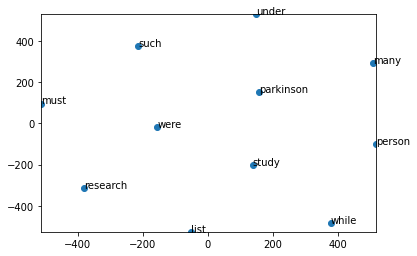

In [3]:
# sent =(map(lambda row:remove_sw(row.split()),comments))
sent=[raw.split() for raw in comments]
phrases = Phrases(sent, min_count=1, progress_per=50000)
print(phrases)
bigram = Phraser(phrases)
sentences = bigram[sent]
# sentences[1]
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
w2v_model.save('w2v_model.model')
w2v_model.init_sims(replace=True)

###Visualize reltaed terms of parkinson disease:
if 'covid' in corpus:
    print(True)
else:
    print(False)
    print("Term Out of Vocabulary")

if 'parkinson' in corpus:
    print(True)
    print("w2v_model.wv['parkinson'] = ",w2v_model.wv['parkinson'])
display_closestwords_tsnescatterplot(w2v_model.wv,'parkinson',300)

In [4]:
if 'corona' in corpus:
    print(True)
else:
    print("Not Existing")
    print("Term Out of Vocabulary")

Not Existing
Term Out of Vocabulary


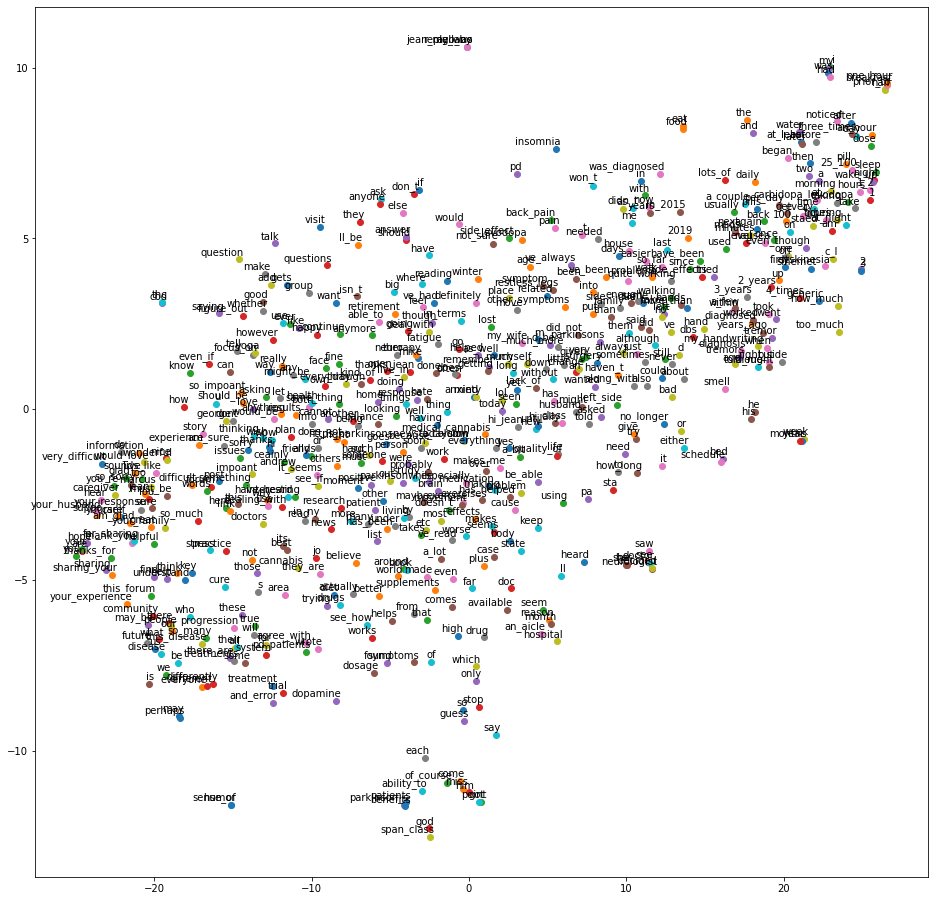

In [5]:
tsne_plot(w2v_model)

<h2 style = "font-family:Verdana;text-align:center;font-size:250%;color:blue" >   Guys!!! Go Ahead and Improve your embeddings </h2>
What do you think is best for our embeddings 
<lu>
    <li> My idea is to remove stop words First!!</li>
    <li> Correct spellings !! </li>
    <li> remove links</li>
    <li>......</li>
</lu>

In [6]:
comments[0]

' yes the first time thanks for the forum and this would be highly benefited to all of us '

In [7]:
Improved_sentences = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153
for raw in comments:
    for word in stopwords:
            token = " " + word + " "
            raw = raw.replace(token, " ")
    Improved_sentences.append(raw)

Improved_sentences[0]

153


' yes first time thanks forum highly benefited us '

In [ ]:
## Retrain your word2vec model and seek the change :D ^_^ by ploting the whole space conf
sent=[raw.split() for raw in Improved_sentences]
phrases = Phrases(sent, min_count=1, progress_per=50000)
print(phrases)
bigram = Phraser(phrases)
transformed_sentences = bigram[sent]
# sentences[1]
w2v_model_improved = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count())
w2v_model_improved.build_vocab(transformed_sentences, progress_per=10000)
w2v_model_improved.train(transformed_sentences, total_examples=w2v_model_improved.corpus_count, epochs=30, report_delay=1)
w2v_model_improved.save('w2v_model_improved.model')
w2v_model_improved.init_sims(replace=True)
#plot the whole space with labels
tsne_plot(w2v_model_improved)

Phrases<44716 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>


<h4 style = "font-family:Verdana;text-align:center;font-size:250%;color:blue" > More !! like : Steeming, removing links, and special characters </h4>

<p style = "font-family:Verdana;font-size:150%;" >Please visit the following link and find more method to enhance data correcteness and get more improvements. </p> <a style = "font-family:Verdana;font-size:150%;" href="https://github.com/hananeGrissette/Datasets-for-online-biomedical-WSD/blob/main/step2_Data_Twitter.ipynb" target="_blank" > Grissette github repository</a>

In [ ]:
from nltk import *

In [ ]:
### by Steeming word and Remove link,user and special characters
# Thus use nltk stopwords list
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocess_by_stemming(text, stem=False):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = re.sub('rt',' ',str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
Improved_sentences = list(map( lambda raw: preprocess_by_stemming(raw.split()),Improved_sentences))

In [ ]:
Improved_sentences[10]

In [ ]:
Improved_sentences[30]

<h2 style = "font-family:Verdana;text-align:center;font-size:250%;color:blue" > Create Word2vec embeddings with [2-4]-grams: </h2>

<p>Do the Same Configuration space But with [2-4]-grams terms</p> and Find Bellow an example :

In [ ]:
#examplle for 
from nltk import ngrams
Sentences="I am a Researcher . Data scientist guy . I am a good person SMILE "
bigram=list(ngrams(Sentences.lower().split(),2))
print("bigram : ")
print(bigram)
trigram=list(ngrams(Sentences.lower().split(),3))
fourgram=list(ngrams(Sentences.lower().split(),4))
print("fourgram : ")
fourgram

In [ ]:
sentence_stream = [doc.split(" ") for doc in comments[1:5]]
bigram = Phrases(sentence_stream, min_count=1, delimiter=b' ')
trigram  = Phrases(bigram[sentence_stream], min_count=1, delimiter=b' ')
##Complete the Following Code to get bigrams and trigrams and Here an example to guide you
for sent in sentence_stream:
    bigrams_ = [b for b in bigram[sent] if b.count(' ') == 1]
    trigrams_ = [t for t in trigram[bigram[sent]] if t.count(' ')==2]
    print(bigrams_)
    print(trigrams_)

In [ ]:
##Train and Save your Word2vec Model with 3grams 
sentence_stream = [doc.split(" ") for doc in comments]
bigram = Phrases(sentence_stream, min_count=1, delimiter=b' ')
trigram  = Phrases(bigram[sentence_stream], min_count=1, delimiter=b' ')
##Complete the Following Code to get bigrams and trigrams and Here an example to guide you
for sent in sentence_stream:
#     bigrams_ = [b for b in bigram[sent] if b.count(' ') == 1]
    trigrams_ = [t for t in trigram[bigram[sent]] if t.count(' ')==2]
sentences = trigram[sentence_stream]
# sentences[1]
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
w2v_model.save('w2v_model_3.model')
w2v_model.init_sims(replace=True)

<h1 style = "font-family:Verdana;text-align:center;font-size:250%;color:blue">Part 1 : Create Neural Networks for training Sequential embedding from scratch </h1>

<h2 style = "font-family:Verdana;font-size:150%"> Why Sequential embedding ! </h2>

### What you'll build

> you have already learnt about traditional NLP methods for such tasks as a language modeling or part of speech tagging or named-entity recognition. So in this part, we are going to cover the same tasks but with neural networks. So neural networks is a very strong technique, and they give state of the art performance now for many kind of tasks such as word representation.

### Embedding layer vs. Embedding algorithm

1. `Word2Vec`:
> It is a pre-trained embedding model using a specific architecture(CBOW,SKIP-GRAM). Word2Vec is a particular "brand" of word embedding algorithm that seeks to embed words such that words often found in `similar context` are located near one another in the embedding space. The technical details are described in <a href = "https://arxiv.org/abs/1301.3781">this paper </a>.
<img src= "tutorials/w2v1.png" />

2. `keras Embedding layer` :
> It also creates word embeddings, but the mechanism is a bit different than Word2Vec. Like any other layer, it is parameterized by a set of weights. The weights are randomly-initialized, then updated during training using the `back-propagation` algorithm. So, the resultant word embeddings are guided by your `loss function`.

> To summarize, both `Word2Vec` and `keras Embedding` convert words (or word indices) to a hopefully meaningful numeric representation. `Word2Vec` is an unsupervised method that seeks to place words with similar context close together in the embedding space. `Keras Embedding` is a supervised method that finds custom embeddings while training your model.
<img src= "tutorials/keras_emb.png" />

In [ ]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [ ]:
# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(padded[3])
print('\n')
print(decode_review(padded[3]))
print('\n')
print(training_sentences[3])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [ ]:
tf.autograph.experimental.do_not_convert(
    func=None
)

In [ ]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

In [ ]:
weights[0]

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
embeddings = {}
words = []
vectors = []
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings[word]=weights[word_num]

In [ ]:
embeddings

In [ ]:
## https://projector.tensorflow.org/

In [ ]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

In [ ]:
weights[11]

In [ ]:
reverse_word_index[102]

<h1 style = "font-family:Verdana;text-align:center;font-size:250%;color:blue">Part 2 : Loading and using Pretrained Neural Word Representation</h1>

# Pre-trained embeddings for biomedical words and sentences : BioWordVec, BioConceptVec, and BioSentVec

1. `BiowordVec()` :
> A new set of word vectors/embeddings using the subword embedding model on two different data sources: biomedical literature and domain knowledge in MeSH. Specifically, we construct a MeSH term graph based on the `MeSH RDF data`, followed by a random sampling strategy to generate a number of MeSH term sequences.  <br> This biomedical word embeddings has been created using `PubMed` and the clinical notes from `MIMIC-III Clinical Database`. Both PubMed and MIMIC-III texts were split and tokenized using NLTK. We also lowercased all the words. We used the same parameters as the original BioWordVec which has been thoroughly evaluated in a range of applications in two modes: <br>  - `BioWordVec vector 13GB (200dim, trained on PubMed+MIMIC-III, word2vec bin format)`<br> - `BioWordVec model 26GB (200dim, trained on PubMed+MIMIC-III`) <br>
> BioWordVec has been evaluated for medical word pair similarity: (1) MayoSRS (101 medical term pairs; and (2) UMNSRS_similarity (566 UMLS concept pairs;) datasets.<br>  Link to download the pretrained embedding is <a href = ' https://github.com/ncbi-nlp/BioWordVec'>https://github.com/ncbi-nlp/BioWordVec</a>

2. `BioConceptVec()` : 
> creating and evaluating literature-based biomedical concept embeddings on a large scale
BioConceptVec using the entire `PubMed`. The texts were split and tokenized using NLTK. We also lowercased all the words.<br> We employed PubTator to annotate biomedical concepts in the PubMed. It covers genes, mutations, chemicals, diseases and cellines. The trained embeddings contain over `400,000 concepts`.  We release four versions of `BioConceptVec (cbow, skip-gram, glove and fastText)`. For each version, we make both the embedding(contains concepts and other words) in binary format and the concept-only file in json format available. <br> Link to download the pretrained embedding is : <a href = 'https://github.com/ncbi-nlp/BioConceptVec#pubtator'>https://github.com/ncbi-nlp/BioConceptVec#pubtator</a> 

3. `BioSentVec()`: 
>An improved biomedical sentence embeddings with sent2vec `700-dimensional sentence embeddings`. We used the bigram model and set window size to be 20 and negative examples 10. <br> It has been evaluated on BioSentVec Benchmarks for clinical sentence pair similarity tasks : -(i)BIOSSES (100 sentence pairs; download <a href = " http://tabilab.cmpe.boun.edu.tr/BIOSSES/DataSet.html) "> Download BIOSSES.</a> and (ii) the MedSTS (1068 sentence pairs)  <a href = " https://arxiv.org/ftp/arxiv/papers/1808/1808.09397.pdf)"> Download MedSTS</a>.  and got accuracy of 85%. <br>
Link to download the pretrained embedding is : <a href = "https://github.com/ncbi-nlp/BioSentVec "> `BioSentVec`  </a> model 21GB (700dim, trained on PubMed+ MIMIC-III Clinical notes)</h3>

## References : 
- Zhang Y, Chen Q, Yang Z, Lin H, Lu Z. BioWordVec, improving biomedical word embeddings with subword information and MeSH. Scientific Data. 2019.
- Chen Q, Peng Y, Lu Z. BioSentVec: creating sentence embeddings for biomedical texts. The 7th IEEE International Conference on Healthcare Informatics. 2019.

In [1]:
import pandas as pd
from utils.w2v import *
from utils.utilsBio import *
# from utils.utils import *

Using TensorFlow backend.


/data/h.grissette/SA/Paper


In [2]:
tweet_epilepsy = pd.read_csv("utils/epilepsy_texts.csv", header=None)
tweet_epilepsy = tweet_epilepsy.drop_duplicates().reset_index(drop=True)
sentences_epilepsy = tweet_epilepsy[1]
print(sentences_epilepsy)
freq_epilepsy=len(sentences_epilepsy)

0       @amepilepsysoc terrific leadership team great ...
1       @amepilepsysoc used interactive program plan #...
2       epilepsy nurses using tec gather data quolie 1...
3       @yellasunshine family suffered huge loss passi...
4       @amundanesarah every day struggle disability #...
                              ...                        
8618    @lotusoak2 #didyouknow us children experience ...
8619    @lotusoak2 #didyouknow us children experience ...
8620    @lotusoak2 #didyouknow us children experience ...
8621    @lotusoak2 #didyouknow us children experience ...
8622    #didyouknow us children experience mmr-vaccine...
Name: 1, Length: 8623, dtype: object


In [3]:
##Twitter Datasets
files = ['covid19_cleaned.csv','covid19_2_cleaned.csv','covid19_3_cleaned.csv']
all_duplicates = {}
sentences = []
freq = []
nb_Tweets=0

for file in files:
    print(file)
    data = pd.read_csv("utils/"+file,names = ['twitter_id', 'name', 'created_at',' followers_count','text'],encoding='latin-1')
    try:
        data.text = data.text.apply(str.lower).apply(lemmatizer.lemmatize).apply(lambda s: s.translate(str.maketrans('', '', string.punctuation)))
    except:
        pass
    duplicates_stream=get_duplicate(data.text)
    nb_Tweets = nb_Tweets+ len(data)
    print("Adding "+ str(len(data))+ " To Dataset")
    all_duplicates.update(duplicates_stream)

for key,value in all_duplicates.items():
    freq.append(value)
    sentences.append(str(key))
    
## please note our twitter data statistics as follow:
print('***** Some Statistics******** ')
print('original tweets length : '+str(len(sentences)))
print('Sentences 1 :',sentences[2])
print('his frequency : ',freq[2])
print('total frequenceies (tweets collected ) : '+ str(nb_Tweets))

covid19_cleaned.csv
Adding 182763 To Dataset
covid19_2_cleaned.csv


/data/h.grissette/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Adding 252522 To Dataset
covid19_3_cleaned.csv
Adding 210830 To Dataset
***** Some Statistics******** 
original tweets length : 287655
Sentences 1 : never allow injection anyone name vaccine covid19 injection close celebraa
his frequency :  0
total frequenceies (tweets collected ) : 646115


In [4]:
remdesivir,frequencies= track_keyword('remdesivir', sentences,freq)
chloroquine,frequencies = track_keyword('chloroquine', sentences,freq)
covid19,frequencies = track_keyword('covid',chloroquine,frequencies)
covid19

['@newbookofdaniel new column @uncoverdc medical misinformation part one hydroxychloroquine come w covid19 let youra',
 '@stevenbollipo hydroxychloroquine lopinavirritonavir remdesivir tocilizumab walk bar look #covid19',
 '@niro60487270 turkey continue stomp covid19 early use hydroxychloroquine death plunge early treatment seemsa',
 '@smahmoud listen bauchi state governor direct doctor bauchi use chloroquine zithromax covid19 patient hea',
 '@thekjohnston remember trump amp blowhard fox wouldnat shut hydroxychloroquine miracle covid cure makina',
 '@ingrahamangle hydroxychloroquine partisan food fight hobble covid19 treatment economic standard',
 '@singleuesguy hydroxychloroquine ninety percent chance help covid19 patient state association',
 'bala muhammed bauchi state governor authorise use chloroquine treata covid19',
 '@channelstv bauchi governor mandate use chloroquine treat covid19',
 '@melissatweets old folk home worker stricken #covid19 use hydroxychloroquine lib doctor kila',

In [5]:
# Load Embedding from Pretrained Google
w2v_google = KeyedVectors.load_word2vec_format(file_path+'/datasets/GoogleNews-vectors-negative300.bin.gz', binary=True,encoding="ISO-8859-1")
Embeddings_google, ignored_words_google = create_embedding_w2v(w2v_google,sentences,300)
print(" Ammount of words ignored by google model : "+str(len(ignored_words_google)))

## Load Embedding concept from BioWordVecc
bio_word2vec = KeyedVectors.load_word2vec_format(file_path+'/datasets/BioWordVec_PubMed_MIMICIII_d200.vec.bin', binary=True,encoding="ISO-8859-1")
Embeddings_bio_word2vec, ignored_words_bio=create_embedding_w2v(bio_word2vec,sentences,200)
print(" Ammount of words ignored by bioword2vec model : "+str(len(ignored_words_bio)))

# Load Embedding concept from PubMed
w2v_concept_cbow = KeyedVectors.load_word2vec_format(file_path+'/datasets/bioconceptvec_word2vec_cbow.bin', binary=True,encoding="ISO-8859-1")
embedd_concepts_cbow, ignored_concept_cbow = create_embedding_w2v(w2v_concept_cbow,sentences,100)
embedd_concepts_cbow[3]
print("Ammount of words ignored by ConceptVec model"+str(len(ignored_concept_cbow))) #66609

embeddings_glove = load_Glove(file_path+"/datasets/glove.840B.300d.txt")
embedding_matrix_glove,words_ignored_glove = create_embedding_glove(embeddings_glove,sentences,300)
print("Ammount of words ignored by Glove model "+ str(len(words_ignored_glove)))

w2v_google.init_sims(True)
w2v_concept_cbow.init_sims(True)
bio_word2vec.init_sims(True)

Total words 283928
241096 words ignored
(283928, 300)
 Ammount of words ignored by google model : 241096
Total words 283928
210593 words ignored
(283928, 200)
 Ammount of words ignored by bioword2vec model : 210593
Total words 283928
218192 words ignored
(283928, 100)
Ammount of words ignored by ConceptVec model218192
Total words 283928
217292 words ignored
(283928, 300)
Ammount of words ignored by Glove model 217292


In [6]:
##Visualize most similar
import gensim
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim.models.keyedvectors import KeyedVectors
from numpy import dot
from numpy.linalg import norm

def cosine_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))

# # load the w2v model
# path_pretraind_model='./GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin'  #set as the path of pretraind model 
# model = KeyedVectors.load_word2vec_format(path_pretraind_model, binary=True)


wlist = ['disease', 'epilepsy','cancer', 'treatement', 'drug','effect','reaction'] ##, 'aeds
lenwlist=len(wlist)
avrsim=[]
#compute cosine similarity between each word in wlist with the other words in wlist  
for i in range(lenwlist):
    word=wlist[i]
    totalsim=0
    wordembed=w2v_google[word] 
    for j in range(lenwlist):
        if i!=j:
            word2embed=w2v_google[wlist[j]] 
            totalsim+=cosine_sim(wordembed, word2embed)
    avrsim.append(totalsim/ (lenwlist-1)) #add the average similarity between word and any other words in wlist   

index_min=avrsim.index(min(avrsim)) #get min similarity        
print(wlist[index_min])

effect


In [7]:
# w2v_google.init_sims(True)
# w2v_concept_cbow.init_sims(True)
# bio_word2vec.init_sims(True)

import numpy as np
from gensim import models

#for tables in Jupyter
from IPython.display import HTML, display
import tabulate

#for visualization
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sPCA
from sklearn import manifold #MSD, t-SNE

In [8]:
from visualize_embed import *

def show_closest_line(vecs,word,n):
    display(HTML("<b>%d words most similar to '%s'</b>" % (n,word)))
    
    tops = vecs.similar_by_word(word, topn=n, restrict_vocab=None)
    
    items = [item[0] for item in tops]
    sims = [item[1] for i,item in enumerate(tops)]
    
    fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)

    
    plt.xticks(range(n), [i+1 for i in range(n)])
    plt.xlabel('Rank')
    plt.ylabel('Similarity')
    plt.xlim(-1,n)

    
    ax.plot(sims, color="purple", alpha=0.5)
    
    for item, x, y in zip(items, range(n), sims):
        ax.annotate( item, xy=(x, y), xytext=(20, -7), textcoords='offset points', 
                     ha='right', va='bottom', color='orange', fontsize=14 )

    
    
    
    plt.show()

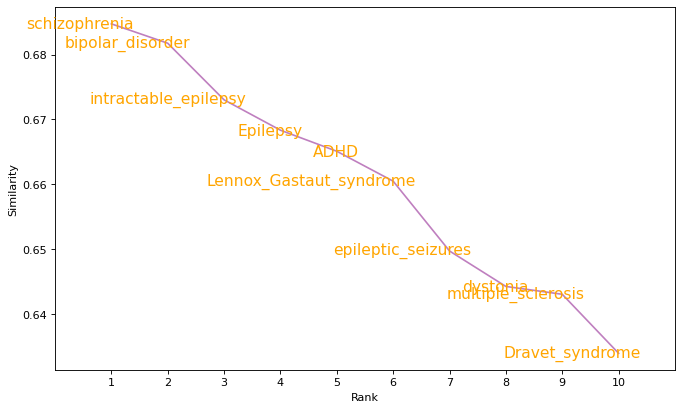

In [9]:
show_closest_line(w2v_google,'epilepsy',10)

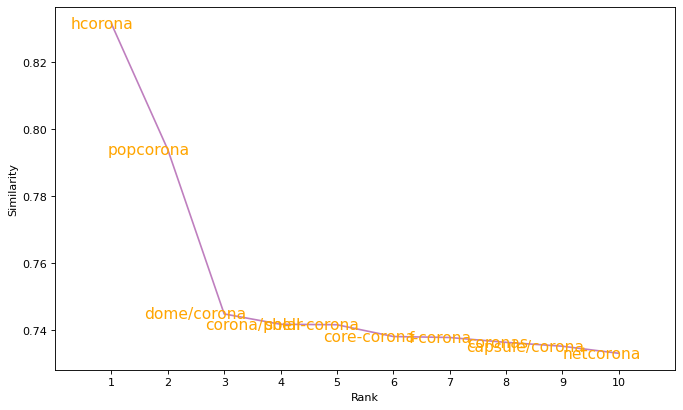

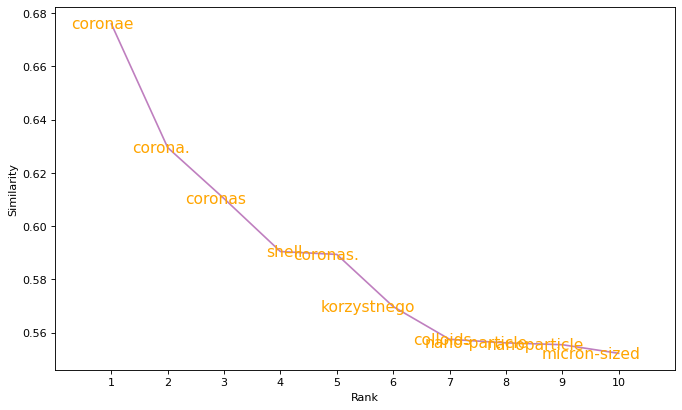

In [10]:
# bio_word2vec
show_closest_line(bio_word2vec,'corona',10)
# embeddings_glove
# show_closest_line(embeddings_glove,'epilepsy',10)
# w2v_concept_cbow
show_closest_line(w2v_concept_cbow,'corona',10)

In [11]:
def show_closest_2d(vecs,word,n,method):
    tops = vecs.similar_by_word(word, topn=n, restrict_vocab=None)
    
    display(HTML("<b>%d words most similar to '%s' (%s)</b>" % (n,word, method)))
    #display(HTML(tabulate.tabulate(tops, tablefmt='html', headers=[])))

    items = [word] + [x[0] for x in tops]

    wvecs = np.array([vecs.word_vec(wd, use_norm=True) for wd in items])

    if method is "PCA":
        spca = sPCA(n_components=2)
        coords = spca.fit_transform(wvecs)
        #print('Explained variation per principal component:', spca.explained_variance_ratio_, "Total:", sum(spca.explained_variance_ratio_))
    
    elif method is "tSNE":
        tsne = manifold.TSNE(n_components=2)
        coords = tsne.fit_transform(wvecs)
        #print("kl-divergence: %0.8f" % tsne.kl_divergence_)
        
    elif method == "tSNE-PCA":
        tsne = manifold.TSNE(n_components=2, init='pca')
        coords = tsne.fit_transform(wvecs)
        #print("kl-divergence: %0.8f" % tsne.kl_divergence_)
    
    elif method is "MDS":
        dists = np.zeros((len(items), len(items)))
        for i,item1 in enumerate(items):
            for j,item2 in enumerate(items):
                dists[i][j] = dists[j][i] = vecs.distance(item1,item2)
        
        mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=0, dissimilarity="precomputed", n_jobs=1)
        coords = mds.fit(dists).embedding_
        #print("Stress is %0.8f" % mds.stress_)

    else:
        raise ValueError("Invalid method: %s" % method) 

    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.tick_params(
        axis='both',          
        which='both',      
        bottom=False,      
        left=False,         
        labelbottom=False,
        labelleft=False)

    lim = max([abs(x) for x in coords[:,0] + coords[:,1]])
    plt.xlim([-lim,lim])
    plt.ylim([-lim,lim])
    plt.scatter(coords[2:,0], coords[2:,1])
    plt.scatter(coords[0:1,0], coords[0:1,1], color='black')
    plt.scatter(coords[1:2,0], coords[1:2,1], color='orange')
    
    for item, x, y in zip(items[2:], coords[2:,0], coords[2:,1]):
        plt.annotate( item, xy=(x, y), xytext=(-2, 2), textcoords='offset points', 
                     ha='right', va='bottom', color='purple', fontsize=14 )

    x0=coords[0,0]
    y0=coords[0,1]
    plt.annotate( word , xy=(x0, y0), xytext=(-2, 2), textcoords='offset points', 
                 ha='right', va='bottom', color='black', fontsize=16 )
    
    x1=coords[1,0]
    y1=coords[1,1]
    plt.annotate( items[1] , xy=(x1, y1), xytext=(-2, 2), textcoords='offset points', 
                 ha='right', va='bottom', color='orange', fontsize=14 )

    ax = plt.gca()
    
    r = math.sqrt( (x1-x0)**2 + (y1-y0)**2 )
    
    circle = plt.Circle((x0, y0), r, color='orange', fill=False)
    ax.add_artist(circle)
    plt.savefig("fig1.png")
    plt.show()

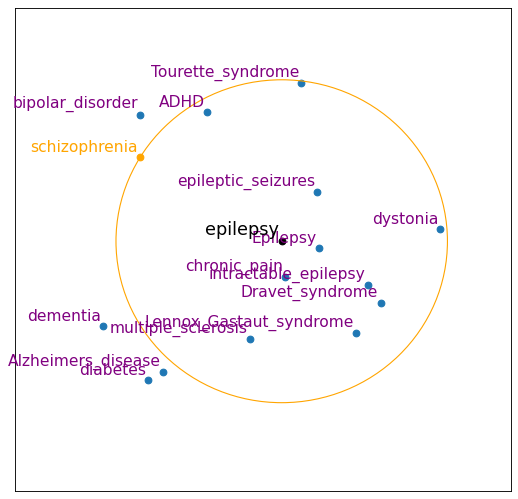

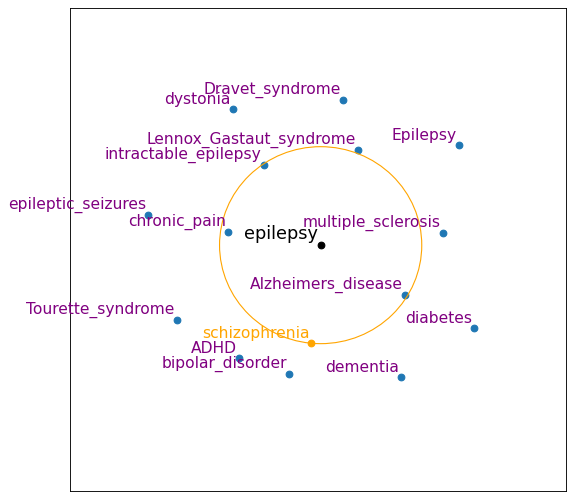

In [14]:
show_closest_2d(w2v_google,'epilepsy',15,'PCA')
show_closest_2d(w2v_google,'epilepsy',15,'MDS')

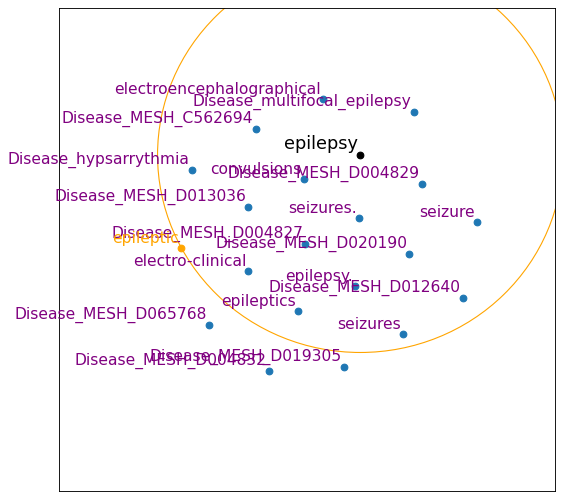

In [15]:
show_closest_2d(w2v_concept_cbow,'epilepsy',20,'tSNE-PCA')







<h1 style = "font-family:Verdana;text-align:center;font-size:250%;color:blue">Part 3 : Fine-tuning task : Sentiment Analysis With Word2Vec Embedding</h1>

<h2>Main Idea</h2>
    <lu>
        <li> Word2Vec model : The Word2Vec embeddings are learnt based on the context and co-occurrence of the words. The semantic and syntactic relationships are maintained in the vectors.
    </lu>

In [1]:
from sklearn.cluster import KMeans
import sys
import json
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
import random
import seaborn
import matplotlib.colors as colors

In [16]:
# ## remove hashtag and mention befor training:
#result = re.sub(r"[,@\'?\.$%_]", "", text, flags=re.I)
sentences = [re.sub(r"@", "", s).strip() for s in sentences]
sentences = [re.sub(r"#", "", s).strip() for s in sentences]
sentences = [re.sub(r"-", "", s).strip() for s in sentences]
sentences = [re.sub(r"_", "", s).strip() for s in sentences]
sentences = [re.sub(r",", " ", s).strip() for s in sentences]
sentences = [re.sub(r":", "", s).strip() for s in sentences]
sentences = [re.sub(r"!", "", s).strip() for s in sentences]
sentences = [re.sub(r"\(", " ", s).strip() for s in sentences]
sentences = [re.sub(r"\)", " ", s).strip() for s in sentences]
sentences = [re.sub(r";", " ", s).strip() for s in sentences]
sentences = [re.sub(r"&", " ", s).strip() for s in sentences]
sentences = [re.sub(r"\"", " ", s).strip() for s in sentences]
sentences = [re.sub(r"\'", " ", s).strip() for s in sentences]
sentences = [re.sub(r"\%", " ", s).strip() for s in sentences]
sentences = [re.sub(r"\`", " ", s).strip() for s in sentences]
sentences = [re.sub(r"\\", " ", s).strip() for s in sentences]
sentences = [re.sub(r"\/", " ", s).strip() for s in sentences]
sentences = [re.sub(r"[\^=~\°\£\}\{\&\|\$\*]", " ", s).strip() for s in sentences]

In [17]:
sentences[1:5]

['small video make protect cellphone covid19 pandemic staysafe',
 'never allow injection anyone name vaccine covid19 injection close celebraa',
 'indigenous perspective covid19 artwork votanhenriquez',
 'magicalsword79 want sexy picture plus hots videos avail pm']

In [18]:
##Train and Save your Word2vec Model with 3grams 
sentence_seq = [doc.split(" ") for doc in sentences]
bigram = Phrases(sentence_seq, min_count=1, delimiter=b' ')
##Complete the Following Code to get bigrams and trigrams and Here an example to guide you
trigram  = Phrases(bigram[sentence_seq], min_count=1, delimiter=b' ')
for sent in sentence_seq:
    bigrams_ = [b for b in bigram[sent] if b.count(' ') == 1]
    trigrams_ = [t for t in trigram[bigram[sent]] if t.count(' ')==2]
# sentences = trigram[sentence_seq]
# Creating Word2Vec model configuration
transformed_sentences = bigram[sentence_seq]
w2v_model_twitter = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count())
w2v_model_twitter.build_vocab(transformed_sentences, progress_per=10000)
w2v_model_twitter.train(transformed_sentences, total_examples=w2v_model_twitter.corpus_count, epochs=30, report_delay=1)
w2v_model_twitter.save('w2v_model_twitter.model')
w2v_model_twitter.init_sims(replace=True)

In [30]:
## asthma was out of vocabulary for first training
w2v_model_twitter.wv.most_similar('asthma')

[('mild symptom', 0.5977044701576233),
 ('higher risk', 0.5630714893341064),
 ('obese', 0.5296190977096558),
 ('symptomsa', 0.5263468623161316),
 ('increase risk', 0.5110438466072083),
 ('greater risk', 0.5097411870956421),
 ('susceptible', 0.5071405172348022),
 ('immunocompromised', 0.5058790445327759),
 ('complication', 0.4961000680923462),
 ('heart disease', 0.48025742173194885)]

In [20]:
# the same with covid19
w2v_model_twitter.wv.most_similar('covid19')

[('coronavirus', 0.7064879536628723),
 ('covid19a', 0.6573365926742554),
 ('covid', 0.5668419599533081),
 ('nigerianewsdesk', 0.5428866744041443),
 ('covid nineteen', 0.5370650887489319),
 ('cova', 0.5219659209251404),
 ('coronavirua', 0.515497088432312),
 ('record first', 0.5070498585700989),
 ('covia', 0.5069063901901245),
 ('covid19 kaduna', 0.504453718662262)]

In [21]:
# Chloroquine medical concept
w2v_model_twitter.wv.most_similar('chloroquine')

[('fda approve', 0.5421336889266968),
 ('zinc', 0.5238357186317444),
 ('experimental drug', 0.5147625207901001),
 ('fda', 0.5100163817405701),
 ('show promise', 0.5050086975097656),
 ('yahoonews', 0.5009517669677734),
 ('hydroxychloroquine', 0.49980029463768005),
 ('pill', 0.4982747435569763),
 ('remdesivir', 0.4974968135356903),
 ('niro60487270', 0.4948645234107971)]

In [22]:
# Injection treatemnts-related medical concept
w2v_model_twitter.wv.most_similar('injection')

[('lysol', 0.5938606262207031),
 ('clorox', 0.5801500082015991),
 ('uv light', 0.57333904504776),
 ('prescribe', 0.5694045424461365),
 ('iv', 0.5617501139640808),
 ('fluid', 0.551094651222229),
 ('tb', 0.5487010478973389),
 ('vitamin c', 0.5458530187606812),
 ('zinc', 0.5315089821815491),
 ('liver', 0.5308915972709656)]

In [23]:
# drug general contexts
w2v_model_twitter.wv.most_similar_cosmul('drug')

[('druga', 0.7414667010307312),
 ('show promise', 0.7268490195274353),
 ('experimental drug', 0.7237666845321655),
 ('efficacy', 0.717573344707489),
 ('drug company', 0.7146846652030945),
 ('pill', 0.7121465802192688),
 ('remdesivir', 0.7110447287559509),
 ('antiviral', 0.7100061774253845),
 ('gilead', 0.7098878622055054),
 ('fda', 0.7086207866668701)]

In [24]:
# remdesivir medical concept
w2v_model_twitter.wv.most_similar_cosmul('remdesivir')

[('experimental drug', 0.829296886920929),
 ('antiviral drug', 0.813705563545227),
 ('gilead', 0.8137035965919495),
 ('drug remdesivir', 0.8063773512840271),
 ('show promise', 0.7973244190216064),
 ('remdesivir treat', 0.7905415892601013),
 ('gilead science', 0.7856979966163635),
 ('fda approval', 0.7795701026916504),
 ('emergency use', 0.7751770615577698),
 ('fda approve', 0.7733132243156433)]

In [25]:
#plot the whole space with labels
# tsne_plot(w2v_model_twitter)

In [26]:
## you can also save your vectors and meta
## create your corpus first:
import io

words = []
for raw in sentence_seq:
    for word in raw:
        words.append(word)
out_v = io.open('vecs_twitter.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_twitter.tsv', 'w', encoding='utf-8')
for word in words:
    try:
        embeddings = w2v_model_twitter.wv[word]
        out_m.write(word + "\n")
        out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
    except:
        pass
out_v.close()
out_m.close()

In [27]:
w2v_model_twitter.wv.doesnt_match("remedisivir is efficient than chloroquine".split())

/data/h.grissette/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'chloroquine'

In [28]:
w2v_model_twitter.wv.most_similar(negative=["drug"])

[('provide update', 0.2537899613380432),
 ('30th', 0.2527438998222351),
 ('april 30th', 0.23491379618644714),
 ('anna', 0.22378841042518616),
 ('3rd may', 0.22042366862297058),
 ('daily update', 0.21566317975521088),
 ('five pm', 0.21359124779701233),
 ('mn', 0.2116745114326477),
 ('please join', 0.21147356927394867),
 ('response team', 0.2113112211227417)]

In [29]:
w2v_model_twitter.wv.most_similar(positive=["drug"])

[('druga', 0.4829348027706146),
 ('show promise', 0.4536994397640228),
 ('experimental drug', 0.4475347399711609),
 ('efficacy', 0.4351480305194855),
 ('drug company', 0.429370641708374),
 ('pill', 0.42429453134536743),
 ('remdesivir', 0.4220907688140869),
 ('antiviral', 0.4200136661529541),
 ('gilead', 0.4197770357131958),
 ('fda', 0.4172428548336029)]

In [40]:
embeddings = np.array(embeddings)
print(embeddings.shape)

(300,)


In [2]:
word_vectors = Word2Vec.load("w2v_model_twitter.model").wv
model = KMeans(n_clusters=2, max_iter=1000, random_state=True, n_init=50).fit(X=word_vectors.vectors)
positive_cluster_center = model.cluster_centers_[0]
negative_cluster_center = model.cluster_centers_[1]

NameError: name 'Word2Vec' is not defined

In [44]:
##After running it on estimated word vectors, I got 2 centroids, with coordinates that can be retrieved with method:
model.cluster_centers_

array([[-0.02656507,  0.22179142,  0.10332754, -0.01631472, -0.03499825,
        -0.07897191,  0.09155796,  0.14236173,  0.12244339,  0.11011537,
        -0.10641342,  0.07113117, -0.04029315, -0.03642226, -0.01635526,
         0.01614322,  0.09485701, -0.0237787 , -0.06001675, -0.03714809,
        -0.12838835,  0.05869413,  0.11193301,  0.0415343 ,  0.03197089,
         0.0647811 , -0.12291599, -0.05599418,  0.01968883,  0.08160569,
        -0.00972414, -0.02782652,  0.02969052, -0.0087835 , -0.00498927,
        -0.1917466 ,  0.05447094,  0.03531622, -0.05723225,  0.03671719,
        -0.04484662, -0.05083334, -0.03893746,  0.10793196, -0.02570013,
         0.00877185,  0.02005769,  0.05509271, -0.07693958, -0.0008905 ,
         0.1333546 ,  0.10321804, -0.13299163, -0.2201842 , -0.11379856,
         0.04210529,  0.03019134,  0.02971504,  0.02406566,  0.00761374,
        -0.00758896,  0.04858932, -0.00548601, -0.03087769,  0.00788593,
         0.07324676, -0.07008738, -0.10565971, -0.1

In [53]:
#Next, to check which cluster is relatively positive, and which negative, with use of
#gensim’s most_similar method I checked what word vectors are most similar in terms of
#cosine similarity to coordinates of first cluster:
word_vectors.similar_by_vector(model.cluster_centers_[0], topn=20, restrict_vocab=None)

[('documentarycompilation ban', 0.7502551674842834),
 ('welcome dark', 0.7049266695976257),
 ('black earring', 0.669119119644165),
 ('booty', 0.663854718208313),
 ('hehe', 0.6546746492385864),
 ('whisper', 0.6522650122642517),
 ('iave always', 0.6469879746437073),
 ('forehead', 0.6451424956321716),
 ('prob', 0.6396759152412415),
 ('jimin', 0.6394435167312622),
 ('fuck fuck', 0.638835072517395),
 ('ngl', 0.6378117203712463),
 ('rly', 0.6370337605476379),
 ('side hoe', 0.6352102756500244),
 ('awkward', 0.6318114399909973),
 ('taehyung', 0.6294915676116943),
 ('cuddle', 0.6278590559959412),
 ('kinda want', 0.6271632313728333),
 ('suck dick', 0.6254331469535828),
 ('homie', 0.6241741180419922)]

In [54]:
## negatives
word_vectors.similar_by_vector(model.cluster_centers_[1], topn=20, restrict_vocab=None)

[('top official', 0.7073491811752319),
 ('one kenyan', 0.6952231526374817),
 ('formula flu', 0.6933842897415161),
 ('truck drivers', 0.6860007643699646),
 ('httweets', 0.6651324033737183),
 ('one burundian', 0.6600788235664368),
 ('srilanka', 0.6525885462760925),
 ('recoa', 0.6502402424812317),
 ('county report', 0.6450814008712769),
 ('seventysix new', 0.6449691653251648),
 ('repoa', 0.6447595953941345),
 ('sixtyone new', 0.6430008411407471),
 ('health ministry', 0.6383732557296753),
 ('sri lanka', 0.6367462873458862),
 ('largest daily', 0.6364120244979858),
 ('find asevere', 0.6351280212402344),
 ('health authority', 0.6350997090339661),
 ('telangana', 0.6348577737808228),
 ('gmanews', 0.6338838934898376),
 ('victoroliveira covidse', 0.6312441825866699)]

## Unsupervised way to Sentiment scoring vectors
>assign each word sentiment score — negative or positive value (-1 or 1) based on the cluster to which they belong. To weigh this score I multiplied it by how close they were to their cluster (to weigh how potentially positive/negative they are). As the score that K-means algorithm outputs is distance from both clusters, to properly weigh them I multiplied them by the inverse of closeness score (divided sentiment score by closeness score).

In [77]:
# from already vocab 
print(words[1:5])
words_Df = pd.DataFrame(word_vectors.vocab.keys())
words_Df.columns = ['words']
words_Df['vectors'] = words_Df.words.apply(lambda x: word_vectors[f'{x}'])

     words
1    small
2    video
3     make
4  protect


In [96]:
# for entry in words_Df.vectors:
#     print(type(entry))
#     entry = entry.astype('double')
#     print(type(entry))

In [99]:
words_Df

,words,vectors
0,text,"[-0.29074305, -0.07139146, -0.06294249, -0.005..."
1,small,"[-0.012002939, 0.6287353, 0.10932904, -0.52979..."
2,video,"[-0.09593925, -0.12417152, 0.3335435, 0.099004..."
3,make,"[-0.33688146, 0.30707997, -0.01317058, 0.15754..."
4,protect,"[-0.062116552, -0.22514465, 0.28341803, 0.1216..."
...,...,...
10364,truck drivers,"[-0.34117687, 0.23378651, 0.1792546, 0.1513994..."
10365,one kenyan,"[-0.1781872, 0.3751408, 0.25318518, 0.09694288..."
10366,one burundian,"[-0.22292586, 0.36178705, 0.271383, 0.08883595..."
10367,nothing basically,"[0.11920401, 0.45522517, -0.078939825, 0.13235..."


In [115]:
words_Df.vectors = words_Df.vectors.apply( lambda x: np.array(x, dtype=np.double)) 

In [120]:
(words_Df.vectors[0][0])

-0.29074305295944214

In [121]:
type(np.double(words_Df.vectors[0][0]))

numpy.float64

In [122]:
words_Df['cluster'] = words_Df.vectors.apply(lambda x: model.predict([np.array(x, dtype=np.double)]))

ValueError: Buffer dtype mismatch, expected 'double' but got 'float'

In [110]:
words_Df['cluster'] = words_Df.vectors.apply(lambda x: model.predict([np.array(np.double(x))]))
words_Df.cluster = words_Df.cluster.apply(lambda x: x[0])
words_Df['cluster_value'] = [1 if i==0 else -1 for i in words_Df.cluster]
words_Df['closeness_score'] = words_Df.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words_Df['sentiment_coeff'] = words_Df.closeness_score * words_Df.cluster_value

In [ ]:
replacement_df = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, file_weighting.title, file_weighting.rate]).T
replacement_df.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence', 'sentiment']
replacement_df['sentiment_rate'] = replacement_df.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df['prediction'] = (replacement_df.sentiment_rate>0).astype('int8')

<h1 style = "font-family:Verdana;text-align:center;font-size:250%;color:blue">Part 4 : Fine-tuning task : Using and improving Pretrained Biomedical Language <h1>

In [108]:
# from utils.utilsLSTM import *

from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform


from senticnet.senticnet import SenticNet


prng = RandomState(1234567890)
np.random.seed(1)

vocab_size = 100000
embedding_dim = 16
max_length = 30
trunc_type='post'
oov_tok = "<OOV>"

In [14]:
def pretrained_embedding_layer(model,model2,model3, word_to_index,emb_dim_max):
    """
    Creates a Keras Embedding() layer and loads in pre-trained  vectors.
    
    Arguments:
    word_to_vec_map -- dictionary mapping words to their GloVe vector representation.
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    embedding_layer -- pretrained layer Keras instance
    """
    words_ignored = []
    vocab_len = len(word_to_index) + 1                  
    emb_matrix = np.zeros([vocab_len,emb_dim_max])
       
    print(' Total words would be processed : '+str(vocab_len))
    for word, idx in word_to_index.items():
        if word in model:
            emb_matrix[idx,:200] = model[word]
            emb_matrix[idx,200:] = 0
        if word in model2:
            emb_matrix[idx, :100] = model2[word]
            emb_matrix[idx, 100:] = 0
        if word in model3.keys():
            emb_matrix[idx,:] = model3[word]
        else:
            words_ignored.append(word)
    print(str(len(words_ignored))+" words ignored")
    print(emb_matrix.shape)   
        
        
    embedding_layer = Embedding(vocab_len,emb_dim_max,trainable = True)
  
    # Build the embedding layer, it is required before setting the weights of the embedding layer. 
    embedding_layer.build((None,)) # Do not modify the "None".  This line of code is complete as-is.
    # Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer,words_ignored 

In [15]:
# embedding_Layer, ignored_words = pretrained_embedding_layer(bio_word2vec,w2v_concept_cbow,embeddings_glove,word_index,300)
# weights = embedding_Layer.get_weights()
#     weights.save_weights('pretrained_ckpt')

In [16]:
def model(input_shape, model,model2,model3, word_to_index):
    """
    Function creating the S model's graph.
    
    Arguments:
    input_shape -- shape of the input, usually (max_len,)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    model -- a model instance in Keras
    """
    
    ### START CODE HERE ###
    # Define sentence_indices as the input of the graph.
    # It should be of shape input_shape and dtype 'int32' (as it contains indices, which are integers).
    sentence_indices = Input(input_shape,dtype='int32')
    
    # Create the embedding layer pretrained with GloVe Vectors (≈1 line)
    embedding_layer, ignored_words = pretrained_embedding_layer(model,model2,model3,word_to_index,300)
    
    # Propagate sentence_indices through your embedding layer
    # (See additional hints in the instructions).
    embeddings = embedding_layer(sentence_indices)
    
    # Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
    # The returned output should be a batch of sequences.
    X = LSTM(units=128,input_shape=input_shape,return_sequences=True)(embeddings)
    # Add dropout with a probability of 0.5
    X = Dropout(rate=0.5)(X)
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    # The returned output should be a single hidden state, not a batch of sequences.
    X = LSTM(units=128,input_shape=input_shape,return_sequences=False)(X)
    # Add dropout with a probability of 0.5
    X = Dropout(rate=0.5)(X)
    # Propagate X through a Dense layer with 5 units
    X = Dense(units=num_classes)(X)
#     X = Dense(6, activation='softmax')
    # Add a softmax activation
#     print(X)
#     print(type(X))
#     print(X.shape)
#     print(sum(X))
    X = Activation('softmax')(X)
    
    # Create Model instance which converts sentence_indices into X.
    model = Model(inputs=sentence_indices,outputs=X)
    
    return model

In [17]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,maxlen=max_length,padding='post',truncating=trunc_type)

maxlen = len(max(sentences, key = len).split())
#     num_classes = len(training_data['sentiment'].unique())
num_classes = len(training_data['sentiment'].unique())
print('num_classes : ',num_classes)
# model = model((120,),bio_word2vec,w2v_concept_cbow,embeddings_glove,word_index)
model = model((max_length,),bio_word2vec,w2v_concept_cbow,embeddings_glove,word_index)
model.summary()
maxLen = max([len(s) for s in sentences])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
X_train_indices = padded
Y_train_oh = to_categorical(training_data['sentiment'],num_classes)

print('padded length : ',len(padded[0]))
print(" padded example : ",padded[0])
print('X_train_indices shape  : ',X_train_indices.shape)
print('training_data[sentiment] length  : ',len(training_data['sentiment']))
print('training_data[sentiment shape  : ',training_data['sentiment'].shape)
print('Y_train_oh shape ',Y_train_oh.shape)
history = model.fit(X_train_indices, Y_train_oh, validation_split=0.33, epochs = 5, batch_size = 32, shuffle=True)
model.save_weights("OurModel_sentics.h5")
# pd.DataFrame.from_dict(model.history.history).to_csv('history_sentics.csv',index=False)
    #         val_loss,val_accuracy,loss,accuracy,lr
    print()
    print("ACCURACY:",score[1])
    print("LOSS:",score[0])
    print(history.history['accuracy'])
    print(history.history['val_accuracy'])
    print(history.history['loss'])
    print(history.history['val_loss'])

e = model.layers[0]
weights = e.get_weights()[0]

IndentationError: unexpected indent (<ipython-input-17-62616a9dd4c8>, line 23)

In [18]:
    tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(sentences)
    word_index = tokenizer.word_index
    sequences = tokenizer.texts_to_sequences(sentences)
    padded = pad_sequences(sequences,maxlen=max_length,padding='post',truncating=trunc_type)
#     embedding_Layer, ignored_words = pretrained_embedding_layer(bio_word2vec,w2v_concept_cbow,embeddings_glove,word_index,300)
    weights = embedding_Layer.get_weights()
#     weights.save_weights('pretrained_ckpt')
    maxlen = len(max(sentences, key = len).split())
#     num_classes = len(training_data['sentiment'].unique())
    num_classes = len(training_data['sentiment'].unique())
    print('num_classes : ',num_classes)
    # model = model((120,),bio_word2vec,w2v_concept_cbow,embeddings_glove,word_index)
    model = model((max_length,),bio_word2vec,w2v_concept_cbow,embeddings_glove,word_index)
    model.summary()
    maxLen = max([len(s) for s in sentences])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    X_train_indices = padded
    Y_train_oh = to_categorical(training_data['sentiment'],num_classes)
    #     frequencies_factor = [(f/sum(freq)) for f in freq]
    #     vectorizer = TfidfVectorizer(max_features=10000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
    #     X = vectorizer.fit_transform(sentences).toarray()
    #     X = [sum(x) for x in X]
    #     Y_train=[Y,X,frequencies_factor]
    print('padded length : ',len(padded[0]))
    print(" padded example : ",padded[0])
    print('X_train_indices shape  : ',X_train_indices.shape)
    print('training_data[sentiment] length  : ',len(training_data['sentiment']))
    print('training_data[sentiment shape  : ',training_data['sentiment'].shape)
    print('Y_train_oh shape ',Y_train_oh.shape)
    history = model.fit(X_train_indices, Y_train_oh, validation_split=0.33, epochs = 5, batch_size = 32, shuffle=True)
    model.save_weights("OurModel_afinn.h5")
    pd.DataFrame.from_dict(model.history.history).to_csv('history_afinn.csv',index=False)
    #         val_loss,val_accuracy,loss,accuracy,lr
    print()
    print("ACCURACY:",score[1])
    print("LOSS:",score[0])
    print(history.history['accuracy'])
    print(history.history['val_accuracy'])
    print(history.history['loss'])
    print(history.history['val_loss'])

    e = model.layers[0]
    weights = e.get_weights()[0]

NameError: name 'pad_sequences' is not defined

In [ ]:
## Do the same thins but using AFINN sentiment lexicon initialization
from afinn import Afinn
af = Afinn()
